In [3]:
#Импорт библиотек 
import numpy as np
import pandas as pd
import seaborn as sns
#from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks") 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
#from sklearn.metrics import prec ision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

In [4]:
#Загружаю данные
data = pd.read_csv('Desktop/Admission_Predict.csv', sep=",")

In [5]:
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [6]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))
#data.columns
#data.dtypes
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Всего строк: 400
Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


In [7]:
#Типы данных значений датасета
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


Так как нет нулевых значений, и нет никаких категориальных признаков - ничего заменять не надо. Но признаков очень много, некоторые можно убрать.

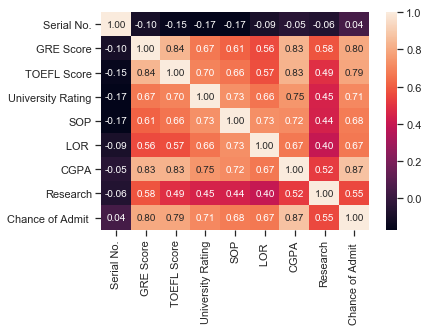

In [8]:
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')

Исходя из этого можно сказать, что некоторые признаки будут только мешать и их стоит убрать.

In [11]:
cols_x = ['GRE Score', 'TOEFL Score', 'SOP', 'Research']   
# целевой признак
col_y = 'University Rating'
#разделение данных
X_train, X_test, y_train, y_test = train_test_split(data[cols_x], data[col_y], test_size = 0.5, random_state = 11)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

200 200


# Классификатор

In [12]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifierObj

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
KNeighborsClassifierObj.fit(X_train, y_train)
KNeighborsClassifierObj.predict(X_test)[0:20]

array([5, 3, 4, 3, 3, 1, 2, 2, 4, 2, 3, 3, 5, 1, 2, 3, 5, 2, 2, 4])

In [14]:
y_test.head(20)

276    5
274    1
164    4
393    2
136    3
124    4
309    4
20     3
392    4
378    1
146    3
217    4
134    5
169    2
251    2
333    3
372    4
295    2
349    3
190    5
Name: University Rating, dtype: int64

С пятью соседями

In [15]:
KNeighborsClassifierObj5 = KNeighborsClassifier(n_neighbors=5)
KNeighborsClassifierObj5

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
KNeighborsClassifierObj5.fit(X_train, y_train)
KNeighborsClassifierObj5.predict(X_test)[0:20]

array([5, 2, 4, 3, 3, 1, 3, 2, 4, 2, 2, 3, 5, 1, 2, 3, 5, 2, 3, 4])

# Проверка точности разными метриками

In [17]:
#5 ближайших соседей
accuracy_score(y_test, KNeighborsClassifierObj5.predict(X_test))

0.485

In [18]:
#3 ближайших соседа 
accuracy_score(y_test, KNeighborsClassifierObj.predict(X_test))

0.465

In [19]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [20]:
# Если целевой признак ==5, 
# то будем считать этот случай 1 в бинарном признаке
bin_y_test = convert_target_to_binary(y_test, 5)
list(zip(y_test, bin_y_test))[0:15]

[(5, 1),
 (1, 0),
 (4, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (4, 0),
 (3, 0),
 (4, 0),
 (1, 0),
 (3, 0),
 (4, 0),
 (5, 1),
 (2, 0),
 (2, 0)]

In [21]:
# Конвертация предсказанных признаков
bin_target3 = convert_target_to_binary(KNeighborsClassifierObj.predict(X_test), 5)
bin_target5 = convert_target_to_binary(KNeighborsClassifierObj5.predict(X_test), 5)

In [23]:
#3 ближайших соседа
balanced_accuracy_score(bin_y_test, bin_target3)

0.7334014300306435

In [24]:
#5 ближайших соседей
balanced_accuracy_score(bin_y_test, bin_target5)

0.7050561797752809

In [27]:
#3 соседа
#precision_score(bin_y_test, bin_target3), recall_score(bin_y_test, bin_target3)

In [28]:
#5 соседей
#precision_score(bin_y_test, bin_target5), recall_score(bin_y_test, bin_target5)

# Кросс-валидация

In [29]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                         data[cols_x], data[col_y], cv=3)

In [30]:
scores

array([0.38518519, 0.56716418, 0.52671756])

In [31]:
np.mean(scores)

0.4930223071805237

In [32]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [33]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=8), 
                        data[cols_x], data[col_y], scoring=scoring, 
                        cv=3, return_train_score=True)

In [34]:
scores

{'fit_time': array([0.00376892, 0.00210404, 0.00217819]),
 'score_time': array([0.02536416, 0.01924896, 0.01819801]),
 'test_precision': array([0.44182974, 0.61715946, 0.5782574 ]),
 'train_precision': array([0.67183685, 0.57918251, 0.59630981]),
 'test_recall': array([0.43703704, 0.58208955, 0.58778626]),
 'train_recall': array([0.67169811, 0.58270677, 0.59851301]),
 'test_f1': array([0.43676533, 0.56361305, 0.57567647]),
 'train_f1': array([0.66529479, 0.57600885, 0.5872707 ])}

In [35]:
#Kfold
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                         data[cols_x], data[col_y], 
                         cv=KFold(n_splits=5))
scores

array([0.425 , 0.375 , 0.5   , 0.5375, 0.5125])

In [36]:
#ShuffleSplit
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                         data[cols_x], data[col_y], 
                         cv=ShuffleSplit(n_splits=5, test_size=0.25))
scores

array([0.49, 0.44, 0.47, 0.5 , 0.55])

# Grid Search (решетчатый поиск)

In [37]:
n_range = np.array(range(2,22,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])}]

In [38]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(data[cols_x], data[col_y])

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [39]:
clf_gs.cv_results_

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/margarita/an

{'mean_fit_time': array([0.0024909 , 0.00206881, 0.00234141, 0.00253797, 0.00246944,
        0.00237432, 0.00236125, 0.00241618, 0.00230379, 0.00212493]),
 'std_fit_time': array([0.0005135 , 0.00016076, 0.00054988, 0.00053577, 0.00032615,
        0.00041258, 0.00032063, 0.00025641, 0.00028253, 0.00013989]),
 'mean_score_time': array([0.00453525, 0.00419264, 0.00420756, 0.00506964, 0.00474348,
        0.00457377, 0.00470777, 0.00495677, 0.00476723, 0.00444179]),
 'std_score_time': array([3.67890062e-04, 8.44469587e-05, 2.04282648e-04, 8.59264391e-04,
        3.67396783e-04, 4.06438143e-04, 3.56572227e-04, 4.83234676e-04,
        3.87829323e-04, 1.70699871e-04]),
 'param_n_neighbors': masked_array(data=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 2},
  {'n_neighbors': 4},
  {'n_neighbors': 6},
  {'n_neighbo

In [40]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [41]:
# Лучшее значение метрики
clf_gs.best_score_

0.5275

In [42]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 10}

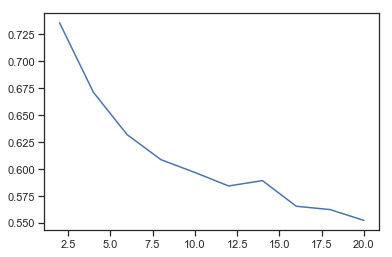

In [43]:
# Изменение качества на обучающей выборке
plt.plot(n_range, clf_gs.cv_results_['mean_train_score'])

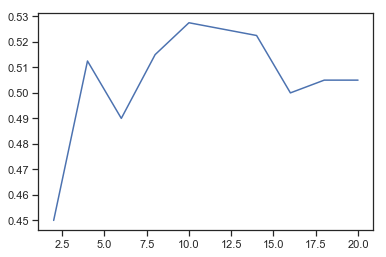

In [44]:
# Изменение качества на тестовой выборке
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [45]:
KNeighborsClassifierObjBest = KNeighborsClassifier(n_neighbors=10)
KNeighborsClassifierObj

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [46]:
KNeighborsClassifierObjBest.fit(X_train, y_train)
KNeighborsClassifierObjBest.predict(X_test)[0:20]

array([5, 2, 4, 3, 3, 2, 3, 3, 3, 2, 2, 3, 5, 2, 2, 3, 5, 3, 3, 4])

In [47]:
accuracy_score(y_test, KNeighborsClassifierObjBest.predict(X_test))

0.52

In [48]:
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [49]:
# Конвертация предсказанных признаков
bin_targetBest = convert_target_to_binary(KNeighborsClassifierObjBest.predict(X_test), 7)

In [50]:
balanced_accuracy_score(bin_y_test, bin_targetBest)

0.5

In [52]:
#precision_score(bin_y_test, bin_targetBest), recall_score(bin_y_test, bin_targetBest)

In [53]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/margarita/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

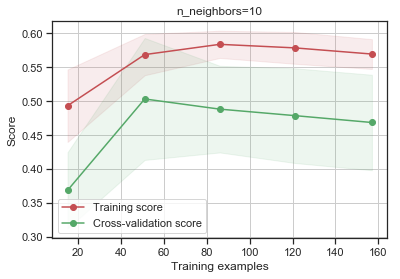

In [54]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=10), 'n_neighbors=10', 
                    X_train, y_train, cv=StratifiedKFold(n_splits=5))

In [55]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/margarita/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

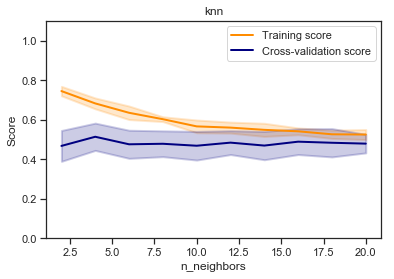

In [56]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      X_train, y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=StratifiedKFold(n_splits=5), scoring="accuracy")